In [40]:
import pandas as pd
df = pd.read_csv('/content/Assignment_Test.csv')

In [41]:
df_UID = df['UID']

In [42]:
df.head()

,UID,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,...,Phone Social Premium.rummycircle,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall
0,1844045271814558464,105615,07/12/22,HUBLI-SF,NaN,VENUGOPAL,H,BHARADHVAJ,7019759674,NO,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,676,100.0,Medium
1,1840349097823778816,91593,07/14/2022,SATNA-SF,MADHYA PRADESH,SHIVDHAR,NaN,CHAUDHARY,7697884828,NO,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,897,-1.0,Low
2,1488102613362294272,74152,07/07/22,LUCKNOW-SF,UTTAR PRADESH,MANISH,NaN,VERMA,8840079825,NO,...,NaN,0.0,1.0,0.0,1.0,NaN,0.0,839,100.0,Medium
3,555529923942874624,110164,07/13/2022,KOLLAM-SF,KERALA,DEEPU,RAVEENDRAN,RAVEENDRAN,8089276854,NO,...,NaN,0.0,0.0,0.0,NaN,NaN,0.0,2050,-1.0,Low
4,1010213070486150912,113037,07/08/22,PURI-SF,ORISSA,AKASHA,NaN,PRADHAN,9337511958,NO,...,NaN,0.0,0.0,0.0,NaN,NaN,0.0,-1,-1.0,Very Low


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   UID                                  2000 non-null   int64  
 1   DEALER ID                            2000 non-null   int64  
 2   APPLICATION LOGIN DATE               2000 non-null   object 
 3   HDB BRANCH NAME                      2000 non-null   object 
 4   HDB BRANCH STATE                     1828 non-null   object 
 5   FIRST NAME                           2000 non-null   object 
 6   MIDDLE NAME                          595 non-null    object 
 7   LAST NAME                            1869 non-null   object 
 8   mobile                               2000 non-null   int64  
 9   AADHAR VERIFIED                      2000 non-null   object 
 10  Cibil Score                          1158 non-null   object 
 11  MOBILE VERIFICATION           

In [44]:
df = df.rename(columns = lambda x: x.replace(" ", "_"))

In [45]:
df.isnull().sum()

,0
UID,0
DEALER_ID,0
APPLICATION_LOGIN_DATE,0
HDB_BRANCH_NAME,0
HDB_BRANCH_STATE,172
FIRST_NAME,0
MIDDLE_NAME,1405
LAST_NAME,131
mobile,0
AADHAR_VERIFIED,0


In [46]:
df = df.drop(['UID', 'FIRST_NAME', 'MIDDLE_NAME', 'LAST_NAME', 'mobile', 'DEALER_NAME', 'DOB', 'EMPLOYER_NAME', 'Pan_Name', 'name', 'APPLICATION_LOGIN_DATE', 'AADHAR_VERIFIED', 'HDB_BRANCH_NAME', 'Primary_Asset_Model_No', 'Personal_Email_Address', 'upi_name', 'EMPLOYER_TYPE', 'MOBILE_VERIFICATION'], axis=1)

In [47]:
import numpy as np

# Select columns starting with 'Phone_Social_Premium'
cols_to_concat = [col for col in df.columns if col.startswith('Phone_Social_Premium')]

# Convert selected columns to numeric, using NaN for non-numeric values
df[cols_to_concat] = df[cols_to_concat].apply(pd.to_numeric, errors='coerce')

# Sum the selected columns, ignoring NaN values
df['Phone_Social_Premium'] = df[cols_to_concat].sum(axis=1)

# Drop the original columns
df = df.drop(cols_to_concat, axis=1)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DEALER_ID                            2000 non-null   int64  
 1   HDB_BRANCH_STATE                     1828 non-null   object 
 2   Cibil_Score                          1158 non-null   object 
 3   TOTAL_ASSET_COST                     978 non-null    float64
 4   ASSET_CTG                            978 non-null    object 
 5   ASSET_MODEL_NO                       2000 non-null   int64  
 6   APPLIED_AMOUNT                       2000 non-null   int64  
 7   PRIMARY_ASSET_MAKE                   2000 non-null   object 
 8   MARITAL_STATUS                       1019 non-null   object 
 9   GENDER                               2000 non-null   object 
 10  AGE                                  2000 non-null   int64  
 11  ADDRESS_TYPE                  

In [49]:
import pandas as pd
def convert_to_numeric(col):
  # Convert to numeric, handling non-convertible values
  df[f'{col}'] = pd.to_numeric(df[f'{col}'], errors='coerce')

  # Round the values before converting to integers to avoid data loss
  df[f'{col}'] = df[f'{col}'].round().astype('Int64') # Round values to nearest integer

In [50]:
convert_to_numeric('Cibil_Score')
convert_to_numeric('TOTAL_ASSET_COST')
# convert_to_numeric('phone_phoneFootprintStrengthOverall')
convert_to_numeric('phone_digitalage')
convert_to_numeric('phone_nameMatchScore')
convert_to_numeric('phone_nameMatchScore')

In [51]:
df.isnull().sum()

,0
DEALER_ID,0
HDB_BRANCH_STATE,172
Cibil_Score,846
TOTAL_ASSET_COST,1022
ASSET_CTG,1022
ASSET_MODEL_NO,0
APPLIED_AMOUNT,0
PRIMARY_ASSET_MAKE,0
MARITAL_STATUS,981
GENDER,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DEALER_ID                            2000 non-null   int64  
 1   HDB_BRANCH_STATE                     1828 non-null   object 
 2   Cibil_Score                          1154 non-null   Int64  
 3   TOTAL_ASSET_COST                     978 non-null    Int64  
 4   ASSET_CTG                            978 non-null    object 
 5   ASSET_MODEL_NO                       2000 non-null   int64  
 6   APPLIED_AMOUNT                       2000 non-null   int64  
 7   PRIMARY_ASSET_MAKE                   2000 non-null   object 
 8   MARITAL_STATUS                       1019 non-null   object 
 9   GENDER                               2000 non-null   object 
 10  AGE                                  2000 non-null   int64  
 11  ADDRESS_TYPE                  

In [53]:
# prompt: one hot encode those columns having object data type

import pandas as pd
# Identify object type columns
object_cols = df.select_dtypes(include=['object']).columns

# One-hot encode object type columns
df = pd.get_dummies(df, columns=object_cols)


In [54]:
# prompt: count the nulls in df

df.isnull().sum()


,0
DEALER_ID,0
Cibil_Score,846
TOTAL_ASSET_COST,1022
ASSET_MODEL_NO,0
APPLIED_AMOUNT,0
...,...
phone_phoneFootprintStrengthOverall_High,0
phone_phoneFootprintStrengthOverall_Low,0
phone_phoneFootprintStrengthOverall_Medium,0
phone_phoneFootprintStrengthOverall_Very High,0


In [55]:
# prompt: keep the categoriacal columns in a sperate df

categorical_cols = df.select_dtypes(include=['object']).columns
df_categorical = df[categorical_cols]


In [56]:
# prompt: impute teh remaining values using KNN of other numeric variable

import numpy as np
from sklearn.impute import KNNImputer

# Select only numeric columns for imputation
numeric_cols = df.select_dtypes(include=np.number).columns

# Create KNN imputer
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Fit and transform the imputer on numeric columns
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 107 entries, DEALER_ID to phone_phoneFootprintStrengthOverall_Very Low
dtypes: bool(98), float64(9)
memory usage: 332.2 KB


In [58]:
import pandas as pd

# Assuming df is your original DataFrame

# List of columns you want to keep
columns_to_keep = [
    'Cibil_Score',
    'ASSET_CTG_MCECA',
    'ASSET_CTG_MCECB',
    'ASSET_CTG_MCEXA',
    'ASSET_CTG_MCPRA',
    'ASSET_CTG_MOECA',
    'ASSET_CTG_SCECA',
    'ASSET_CTG_SCEXA',
    'PRIMARY_ASSET_MAKE_AMO ELECTRIC',
    'PRIMARY_ASSET_MAKE_BAJAJ AUTO INDIA',
    'MARITAL_STATUS_Married',
    'MARITAL_STATUS_Single',
    'ADDRESS_TYPE_Parental',
    'ADDRESS_TYPE_RESIDENCE',
    'ADDRESS_TYPE_Rented',
    'ADDRESS_TYPE_Self/Spouse Owned',
    'EMPLOY_CONSTITUTION_SALARIED',
    'EMPLOY_CONSTITUTION_SELF-EMPLOYED'
]

# Keep only the specified columns
df = df[columns_to_keep]

# Display the filtered DataFrame

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Cibil_Score                          2000 non-null   float64
 1   ASSET_CTG_MCECA                      2000 non-null   bool   
 2   ASSET_CTG_MCECB                      2000 non-null   bool   
 3   ASSET_CTG_MCEXA                      2000 non-null   bool   
 4   ASSET_CTG_MCPRA                      2000 non-null   bool   
 5   ASSET_CTG_MOECA                      2000 non-null   bool   
 6   ASSET_CTG_SCECA                      2000 non-null   bool   
 7   ASSET_CTG_SCEXA                      2000 non-null   bool   
 8   PRIMARY_ASSET_MAKE_AMO ELECTRIC      2000 non-null   bool   
 9   PRIMARY_ASSET_MAKE_BAJAJ AUTO INDIA  2000 non-null   bool   
 10  MARITAL_STATUS_Married               2000 non-null   bool   
 11  MARITAL_STATUS_Single         

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [25]:

# # Drop the target column from the feature set
# df_features = df

In [26]:
# # Standardize the continuous features
# scaler = StandardScaler()
# df_features[['Cibil_Score']] = scaler.fit_transform(df_features[['Cibil_Score']])

In [27]:
# # Convert boolean columns to integers
# bool_columns = df_features.columns.difference(['Cibil_Score'])
# df_features[bool_columns] = df_features[bool_columns].astype(int)

In [37]:
# # Apply PCA
# pca = PCA(n_components=0.95)  # Retain 95% of the variance
# df_pca = pd.DataFrame(pca.fit_transform(df_features))

In [38]:
# import joblib

# # Load the saved model
# loaded_model = joblib.load('/content/best_gradient_boosting_model.pkl')

In [39]:
# df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2000 non-null   float64
 1   1       2000 non-null   float64
 2   2       2000 non-null   float64
 3   3       2000 non-null   float64
 4   4       2000 non-null   float64
 5   5       2000 non-null   float64
 6   6       2000 non-null   float64
 7   7       2000 non-null   float64
 8   8       2000 non-null   float64
dtypes: float64(9)
memory usage: 140.8 KB


In [61]:
# Make predictions
predictions = loaded_model.predict(df)

# If you need probabilities instead of class predictions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 18 features, but GradientBoostingClassifier is expecting 10 features as input.

In [ ]:
predictions_df = pd.DataFrame(predictions, columns=['Prediction'])

In [ ]:

predictions_df['Prediction'] = predictions_df['Prediction'].map({0: 'DECLINED', 1: 'APPROVED'})


In [ ]:
predictions_df.to_csv('test_pred.csv', index=False)

In [ ]:
result_df = pd.concat([df_UID, predictions_df], axis=1)

In [ ]:
result_df.to_csv('test_pred_with_uid.csv', index=False)

In [ ]:
from google.colab import files
files.download('test_pred_with_uid.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: I have two files /content/test_pred_with_uid.csv and /content/test_pred_with_uid_new_imputation.csv find the number and percentage of similar acceptance status

import pandas as pd

# Load the two CSV files
df1 = pd.read_csv('/content/test_pred_with_uid.csv')
df2 = pd.read_csv('/content/test_pred_with_uid_new_imputation.csv')

# Merge the two DataFrames on the 'UID' column
merged_df = pd.merge(df1, df2, on='UID', suffixes=('_old', '_new'))

# Count the number of rows where the 'Prediction' columns match
num_similar = (merged_df['Prediction_old'] == merged_df['Prediction_new']).sum()

# Calculate the percentage of similar predictions
percentage_similar = (num_similar / len(merged_df)) * 100

print(f"Number of similar acceptance statuses: {num_similar}")
print(f"Percentage of similar acceptance statuses: {percentage_similar:.2f}%")


Number of similar acceptance statuses: 1711
Percentage of similar acceptance statuses: 85.55%


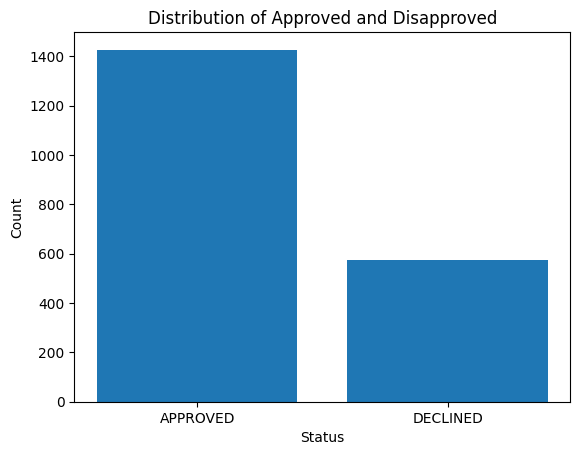

Approved Ratio: 0.29
Disapproved Ratio: 0.71


<ipython-input-64-bb793c2248cb>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  approved_ratio = status_counts[1] / status_counts.sum()
<ipython-input-64-bb793c2248cb>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  disapproved_ratio = status_counts[0] / status_counts.sum()


In [64]:
# prompt: From this /content/prediction.csv
#  draw the plot of accepted and disaproved and give the ratio approved_ratio = status_counts[1] / status_counts.sum()
# disapproved_ratio = status_counts[0] / status_counts.sum()
# print(f"Approved Ratio: {approved_ratio:.2f}")
# print(f"Disapproved Ratio: {disapproved_ratio:.2f}")

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('/content/prediction.csv')

# Count the occurrences of each status
status_counts = df['Prediction'].value_counts()

# Plot the counts
plt.bar(status_counts.index, status_counts.values)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Approved and Disapproved')
plt.show()

# Calculate the ratios
approved_ratio = status_counts[1] / status_counts.sum()
disapproved_ratio = status_counts[0] / status_counts.sum()

print(f"Approved Ratio: {approved_ratio:.2f}")
print(f"Disapproved Ratio: {disapproved_ratio:.2f}")
